# Analysis of Regression Results

## Overview
This notebook presents the results from various regression models. We aim to compare the performance of each model and draw meaningful conclusions about their predictive capabilities for the report.

In [3]:
from ridge_regression import RidgeRegression
import data_utils

%load_ext autoreload
%autoreload 2

linear = RidgeRegression(0)
ridge = RidgeRegression(1)

In [4]:
train_ny, test_ny = data_utils.load_newyork(17)
train_was, test_was = data_utils.load_washington(17)
train_bos, test_bos = data_utils.load_boston(17)
train_ex, test_ex = data_utils.load_extended_boston(17)
train_cal, test_cal = data_utils.load_california(17)

In [69]:
linear.train(train_ny)
print(linear.r_score())
print(linear.mse)

0.6849257934697055
1131201804680.6782


In [70]:
linear.test(test_ny)
print(linear.r_score())
print(linear.mse)

0.6689971588802188
887183715892.5913


In [71]:
linear.train(train_was)
print(linear.r_score())
print(linear.mse)

0.2146660875553449
268361027051.496


In [72]:
linear.test(test_was)
print(linear.r_score())
print(linear.mse)

0.2273321995018438
190219825622.26248


In [73]:
linear.train(train_bos)
print(linear.r_score())
print(linear.mse)

0.7303884158092541
23.362241671561097


In [74]:
linear.test(test_bos)
print(linear.r_score())
print(linear.mse)

0.7663974484223854
18.114721086711175


In [75]:
linear.train(train_ex)
print(linear.r_score())
print(linear.mse)

0.9423892279654961
4.992058420616967


In [76]:
linear.test(test_ex)
print(linear.r_score())
print(linear.mse)

0.838611345073881
12.51489100098628


In [77]:
linear.train(train_cal)
print(linear.r_score())
print(linear.mse)

0.6077669420281298
0.5242882100946792


In [78]:
linear.test(test_cal)
print(linear.r_score())
print(linear.mse)

0.6006728254450008
0.5255634044896279


In [79]:
ridge.train(train_ny)
print(ridge.r_score())
print(ridge.mse)
ridge.test(test_ny)
print(ridge.r_score())
print(ridge.mse)

0.6848588330182799
1131442210851.4307
0.6721669364918786
878687791596.1354


In [80]:
ridge.train(train_was)
print(ridge.r_score())
print(ridge.mse)
ridge.test(test_was)
print(ridge.r_score())
print(ridge.mse)

0.2146596529457213
268363225859.44238
0.2275926238141921
190155712859.6357


In [81]:
ridge.train(train_bos)
print(ridge.r_score())
print(ridge.mse)
ridge.test(test_bos)
print(ridge.r_score())
print(ridge.mse)

0.7281570340322314
23.555594195684986
0.7607124630940674
18.555563547159693


In [82]:
ridge.train(train_ex)
print(ridge.r_score())
print(ridge.mse)
ridge.test(test_ex)
print(ridge.r_score())
print(ridge.mse)

0.8624259623180445
11.920993401323653
0.8532359944094008
11.380821865547588


In [83]:
ridge.train(train_cal)
print(ridge.r_score())
print(ridge.mse)
ridge.test(test_cal)
print(ridge.r_score())
print(ridge.mse)

0.607766903723707
0.5242882612952519
0.6006616017047446
0.5255781763046107


In [84]:
datasets = [
    ('New York', train_ny, test_ny),
    ('Washington', train_was, test_was),
    ('Boston', train_bos, test_bos),
    ('Extended Boston', train_ex, test_ex),
    ('California', train_cal, test_cal)
]

# Initialize an empty list to store table rows
table_rows = []

# Iterate through datasets to train, test, and calculate scores
for name, train_data, test_data in datasets:
    # Train and test linear regression
    linear.train(train_data)
    linear_mse_train = linear.mse
    linear.test(test_data)
    linear_mse_test = linear.mse
    # Train and test ridge regression
    ridge.train(train_data)
    ridge_mse_train = ridge.mse
    ridge.test(test_data)  # Assuming you also want to test it on test_data
    ridge_mse_test = ridge.mse
    
    # Generate LaTeX table row
    row = f"{name} & {linear_mse_train:.4f} & {linear_mse_test:.4f} & {ridge_mse_train:.4f} & {ridge_mse_test:.4f} \\\\"
    table_rows.append(row)

# Print the rows for inclusion in the LaTeX table
for row in table_rows:
    print(row)

New York & 1131201804680.6782 & 887183715892.5913 & 1131442210851.4307 & 878687791596.1354 \\
Washington & 268361027051.4960 & 190219825622.2625 & 268363225859.4424 & 190155712859.6357 \\
Boston & 23.3622 & 18.1147 & 23.5556 & 18.5556 \\
Extended Boston & 4.9921 & 12.5149 & 11.9210 & 11.3808 \\
California & 0.5243 & 0.5256 & 0.5243 & 0.5256 \\


In [85]:
from lasso_regression import LassoRegression
from data_utils import StandardScaler
import numpy as np

scaler = StandardScaler()
lasso = LassoRegression(learning_rate=0.01, lasso_lambda=1)
# Scale data
X_train, Y_train = scaler.fit_transform(train_ny[:, :-1]), train_ny[:, -1] 
X_cal, Y_cal = scaler.transform(test_ny[:, :-1]), test_ny[:, -1]

train_ny = np.hstack((X_train, Y_train.reshape(-1, 1)))
test_ny = np.hstack((X_cal, Y_cal.reshape(-1, 1)))

In [86]:
lasso.train(train_ny)
lasso.r_score()

IndentationError: unexpected indent (2779341144.py, line 3)

In [ ]:
lasso.test(test_ny)
lasso.r_score()

0.6689972958637062

In [92]:
import data_utils

lambdas = [0.01, 0.1, 1, 10, 100, 1000, 10000]
# Initialize an empty list to store table rows
table_rows = []

# Iterate through datasets to train, test, and calculate scores
for lambda_ in lambdas:
    # Train and test linear regression
    linear.train(train_ny)
    linear_r2_train = linear.r_score()
    linear.test(test_ny)
    linear_r2_test = linear.r_score()

    # Train and test ridge regression
    ridge = RidgeRegression(lambda_)
    ridge.train(train_ny)
    ridge_r2_train = ridge.r_score()
    ridge.test(test_ny)
    ridge_r2_test = ridge.r_score()

    # Train and test lasso regression
    train_ny_norm, test_ny_norm = data_utils.normalize(train_ny, test_ny)
    lasso = LassoRegression(learning_rate=0.01, lasso_lambda=lambda_)
    lasso.train(train_ny_norm)
    lasso_r2_train = lasso.r_score()
    lasso.test(test_ny_norm)
    lasso_r2_test = lasso.r_score()
    
    # Generate LaTeX table row
    row_train = f"{linear_r2_train:.4f} & {ridge_r2_train:.4f} & {lasso_r2_train:.4f} \\\\"
    table_rows.append(row_train)
    row_test = f"{linear_r2_test:.4f} & {ridge_r2_test:.4f} & {lasso_r2_test:.4f} \\\\"
    table_rows.append(row_test)

# Print the rows for inclusion in the LaTeX table
for row in table_rows:
    print(row)

0.6849 & 0.6849 & 0.6849 \\
0.6690 & 0.6690 & 0.6690 \\
0.6849 & 0.6849 & 0.6849 \\
0.6690 & 0.6693 & 0.6690 \\
0.6849 & 0.6849 & 0.6849 \\
0.6690 & 0.6722 & 0.6690 \\
0.6849 & 0.6812 & 0.6849 \\
0.6690 & 0.6886 & 0.6690 \\
0.6849 & 0.6271 & 0.6849 \\
0.6690 & 0.6813 & 0.6690 \\
0.6849 & 0.4239 & 0.6849 \\
0.6690 & 0.4994 & 0.6691 \\
0.6849 & 0.2973 & 0.6849 \\
0.6690 & 0.3673 & 0.6703 \\


In [95]:
lambdas = [0.01, 0.1, 1, 10000]
# Initialize an empty list to store table rows
table_rows = []

# Iterate through datasets to train, test, and calculate scores
for lambda_ in lambdas:
    # Train and test linear regression
    linear.train(train_ny)
    linear_mse_train = linear.mse
    linear.test(test_ny)
    linear_mse_test = linear.mse

    # Train and test ridge regression
    ridge = RidgeRegression(lambda_)
    ridge.train(train_ny)
    ridge_mse_train = ridge.mse
    ridge.test(test_ny)
    ridge_mse_test = ridge.mse

    # Train and test lasso regression
    train_ny_norm, test_ny_norm = data_utils.normalize(train_ny, test_ny)
    lasso = LassoRegression(learning_rate=0.01, lasso_lambda=lambda_)
    lasso.train(train_ny_norm)
    lasso_mse_train = lasso.mse
    lasso.test(test_ny_norm)
    lasso_mse_test = lasso.mse
    
    # Generate LaTeX table row
    row_train = f"MSE Train, $\lambda$={lambda_} & {linear_mse_train:4f} & {ridge_mse_train:4f} & {lasso_mse_train:4f} \\\\"
    table_rows.append(row_train)
    row_test = f"MSE Test, $\lambda$={lambda_} & {linear_mse_test:4f} & {ridge_mse_test:4f} & {lasso_mse_test:4f} \\\\"
    table_rows.append(row_test)

# Print the rows for inclusion in the LaTeX table
for row in table_rows:
    print(row)

MSE Train, $\lambda$=0.01 & 1131201804680.678223 & 1131201830894.109131 & 1131201804680.684326 \\
MSE Test, $\lambda$=0.01 & 887183715892.591309 & 887092867310.040405 & 887183709688.942627 \\
MSE Train, $\lambda$=0.1 & 1131201804680.678223 & 1131204404856.536377 & 1131201804680.701172 \\
MSE Test, $\lambda$=0.1 & 887183715892.591309 & 886280898437.117432 & 887183676875.032349 \\
MSE Train, $\lambda$=1 & 1131201804680.678223 & 1131442210851.430664 & 1131201804682.337402 \\
MSE Test, $\lambda$=1 & 887183715892.591309 & 878687791596.135376 & 887183348737.074219 \\
MSE Train, $\lambda$=10000 & 1131201804680.678223 & 2522857750183.595703 & 1131366673495.389160 \\
MSE Test, $\lambda$=10000 & 887183715892.591309 & 1695803393664.159424 & 883666227895.784790 \\


In [102]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
table_rows = []
for lambda_ in lambdas:
    # Train and test linear regression
    linear.train(train_ex)
    linear_r2_train = linear.r_score()
    linear.test(test_ex)
    linear_r2_test = linear.r_score()

    # Train and test ridge regression
    ridge = RidgeRegression(lambda_)
    ridge.train(train_ex)
    ridge_r2_train = ridge.r_score()
    ridge.test(test_ex)
    ridge_r2_test = ridge.r_score()

    # Train and test lasso regression
    train_ex_norm, test_ex_norm = data_utils.normalize(train_ex, test_ex)
    lasso = LassoRegression(learning_rate=0.001, lasso_lambda=lambda_, max_iterations=100000)
    lasso.train(train_ex_norm)
    lasso_r2_train = lasso.r_score()
    lasso.test(test_ex_norm)
    lasso_r2_test = lasso.r_score()
    
    # Generate LaTeX table row
    row_train = f"R² Train, $\lambda$={lambda_} &{linear_r2_train:.4f} & {ridge_r2_train:.4f} & {lasso_r2_train:.4f} \\\\"
    table_rows.append(row_train)
    row_test = f"R² Test, $\lambda$={lambda_} & {linear_r2_test:.4f} & {ridge_r2_test:.4f} & {lasso_r2_test:.4f} \\\\"
    table_rows.append(row_test)

# Print the rows for inclusion in the LaTeX table
for row in table_rows:
    print(row)

R² Train, $\lambda$=0.001 &0.9424 & 0.9412 & 0.9236 \\
R² Test, $\lambda$=0.001 & 0.8386 & 0.8490 & 0.8475 \\
R² Train, $\lambda$=0.01 &0.9424 & 0.9329 & 0.9179 \\
R² Test, $\lambda$=0.01 & 0.8386 & 0.8468 & 0.8507 \\
R² Train, $\lambda$=0.1 &0.9424 & 0.9127 & 0.8913 \\
R² Test, $\lambda$=0.1 & 0.8386 & 0.8601 & 0.8519 \\
R² Train, $\lambda$=1 &0.9424 & 0.8624 & 0.8005 \\
R² Test, $\lambda$=1 & 0.8386 & 0.8532 & 0.8042 \\
R² Train, $\lambda$=10 &0.9424 & 0.7560 & 0.0285 \\
R² Test, $\lambda$=10 & 0.8386 & 0.7540 & -0.0330 \\
R² Train, $\lambda$=100 &0.9424 & 0.5616 & -5.6971 \\
R² Test, $\lambda$=100 & 0.8386 & 0.5107 & -6.6408 \\
R² Train, $\lambda$=1000 &0.9424 & 0.2600 & -5.9200 \\
R² Test, $\lambda$=1000 & 0.8386 & 0.2418 & -7.2438 \\
R² Train, $\lambda$=10000 &0.9424 & 0.0491 & -1076.1532 \\
R² Test, $\lambda$=10000 & 0.8386 & 0.0444 & -1198.4267 \\


In [105]:
table_rows = []

# Iterate through datasets to train, test, and calculate scores
for lambda_ in lambdas:
    # Train and test linear regression
    linear.train(train_ex)
    linear_mse_train = linear.mse
    linear.test(test_ex)
    linear_mse_test = linear.mse

    # Train and test ridge regression
    ridge = RidgeRegression(lambda_)
    ridge.train(train_ex)
    ridge_mse_train = ridge.mse
    ridge.test(test_ex)
    ridge_mse_test = ridge.mse

    # Train and test lasso regression
    train_ex_norm, test_ex_norm = data_utils.normalize(train_ex, test_ex)
    lasso = LassoRegression(learning_rate=0.001, lasso_lambda=lambda_, max_iterations=100000)
    lasso.train(train_ex_norm)
    lasso_mse_train = lasso.mse
    lasso.test(test_ex_norm)
    lasso_mse_test = lasso.mse
    
    # Generate LaTeX table row
    row_train = f"MSE Train, $\lambda$={lambda_} & {linear_mse_train:4f} & {ridge_mse_train:4f} & {lasso_mse_train:4f} \\\\"
    table_rows.append(row_train)
    row_test = f"MSE Test, $\lambda$={lambda_} & {linear_mse_test:4f} & {ridge_mse_test:4f} & {lasso_mse_test:4f} \\\\"
    table_rows.append(row_test)

# Print the rows for inclusion in the LaTeX table
for row in table_rows:
    print(row)

MSE Train, $\lambda$=0.001 & 4.992058 & 5.094776 & 6.623917 \\
MSE Test, $\lambda$=0.001 & 12.514891 & 11.708657 & 11.823062 \\
MSE Train, $\lambda$=0.01 & 4.992058 & 5.817922 & 7.110313 \\
MSE Test, $\lambda$=0.01 & 12.514891 & 11.877098 & 11.580209 \\
MSE Train, $\lambda$=0.1 & 4.992058 & 7.565534 & 9.417083 \\
MSE Test, $\lambda$=0.1 & 12.514891 & 10.852412 & 11.481876 \\
MSE Train, $\lambda$=1 & 4.992058 & 11.920993 & 17.284409 \\
MSE Test, $\lambda$=1 & 12.514891 & 11.380822 & 15.180454 \\
MSE Train, $\lambda$=10 & 4.992058 & 21.139848 & 84.178221 \\
MSE Test, $\lambda$=10 & 12.514891 & 19.073625 & 80.100986 \\
MSE Train, $\lambda$=100 & 4.992058 & 37.991240 & 580.313171 \\
MSE Test, $\lambda$=100 & 12.514891 & 37.943461 & 592.507255 \\
MSE Train, $\lambda$=1000 & 4.992058 & 64.123039 & 599.626693 \\
MSE Test, $\lambda$=1000 & 12.514891 & 58.796462 & 639.267247 \\
MSE Train, $\lambda$=10000 & 4.992058 & 82.400789 & 93336.915878 \\
MSE Test, $\lambda$=10000 & 12.514891 & 74.102807 

In [132]:
import model_selection
lambdas = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
table_rows = []
k_vals= [3, 5, 10, 20]
data = np.concatenate((train_bos, test_bos), axis=0)
for k in k_vals:
    # Train and test linear regression
    train_score, test_score = model_selection.k_fold_cross_validation(linear, data, k)
    print(train_score, test_score)

    # Train and test ridge regression
    ridge = model_selection.lambda_ridge(data, k, lambdas, score="R-Squared")

    # Train and test lasso regression
    lasso_model = LassoRegression(learning_rate=0.01, lasso_lambda=lambda_, max_iterations=100000)
    lasso = model_selection.lambda_lasso(data, k, lambdas, lasso_model, score="R-Squared")
    print(k)

0.7431284333984453 0.7109490510811224
0.7109490500115495
0.7109489441056134
0.7109479796688555
0.7109381724757474
0.7108249688856602
0.7088448603056016
0.680603052374997
0.481450128872332
0.13377719802633473
Best lambda: 1e-05, with score: 0.7109490500115495
Training Score:  0.7431284333984424  Test Score:  0.7109490500115495
0.6957945311481435
0.695453852808014
0.6921680674912691
0.6614694042374847
0.3165927285992478
0.12989623234958744
-21.01479250087314
-2177.2001085301367
-217843.7638329285
Best lambda: 1e-05, with score: 0.6957945311481435
Training Score:  0.6957945311481435  Test Score:  0.6957945311481435
0.7426053481547372 0.6952462278258061
0.6952462274285774
0.6952461880874437
0.6952458290365582
0.6952421003327834
0.6951918991266728
0.6939525700236697
0.6744917596337123
0.5051425252486503
0.15120661435070298
Best lambda: 1e-05, with score: 0.6952462274285774
Training Score:  0.7426053481547351  Test Score:  0.6952462274285774
0.6794962953103104
0.6792109482857808
0.6766024316

In [135]:
import model_selection
lambdas = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
table_rows = []
k_vals= [3, 5, 10, 20]
data = np.concatenate((train_bos, test_bos), axis=0)
for k in k_vals:

    # Train and test lasso regression
    print(k)
    lasso_model = LassoRegression(learning_rate=0.01, lasso_lambda=lambda_, max_iterations=100000)
    lasso = model_selection.lambda_lasso(data, k, lambdas, lasso_model, score="R-Squared")

3
0.6957945311481435
0.695453852808014
0.6921680674912691
0.6614694042374847
0.3165927285992478
0.12989623234958744
-21.01479250087314
-2177.2001085301367
-217843.7638329285
Best lambda: 1e-05, with score: 0.6957945311481435
Training Score:  0.7285787573849786  Test Score:  0.6957945311481435
5
0.6794962953103104
0.6792109482857808
0.6766024316957715
0.6447093111758242
0.3064369432962092
0.1724055802122501
-20.675310838661005
-2151.9850915069064
-215423.58483810612
Best lambda: 1e-05, with score: 0.6794962953103104
Training Score:  0.7278520356917545  Test Score:  0.6794962953103104
10
0.6847275379328714
0.6844641521016988
0.681984163032462
0.653827612304506
0.31803907142849425
0.007838261649813227
-21.84502558220715
-2260.298368887978
-226165.31096191006
Best lambda: 1e-05, with score: 0.6847275379328714
Training Score:  0.7268888034467762  Test Score:  0.6847275379328714
20
0.6607445575800558
0.6605132674804661
0.6580359671313222
0.631867474313984
0.31194917119831567
0.01773975116545

In [115]:
import model_selection
lambdas = [0]
model_selection.k_fold_cross_validation(linear, data, 20, "R-Squared")

Training Score:  0.7413816744316533  Test Score:  0.6756287352582154


0.6756287352582154

In [125]:
import model_selection
model_selection.k_fold_cross_validation(linear, data, 20, "MSE")

Training Score:  0.25861832556834674  Test Score:  0.2853823109342325


0.2853823109342325

In [139]:
import model_selection
lambdas = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
k_vals= [3, 5, 10, 20]
data = np.concatenate((train_cal, test_cal), axis=0)
for k in k_vals:
    print(k)
    # Train and test linear regression
    train_score, test_score = model_selection.k_fold_cross_validation(linear, data, k, score="MSE")
    print(train_score, test_score)

    # Train and test ridge regression
    ridge = model_selection.lambda_ridge(data, k, lambdas, score="MSE")

    # Train and test lasso regression
    lasso_model = LassoRegression(learning_rate=0.01, lasso_lambda=lambda_, max_iterations=10000)
    lasso = model_selection.lambda_lasso(data, k, lambdas, lasso_model, score="MSE")

3
0.39152106975945244 0.5221775110253722
0.5221775111963171
0.5221775281198343
0.5221776819759991
0.522179221130802
0.5221946718337014
0.5223549360812957
0.5244006250127974
0.5479654270704912
0.6173744941002681
Best lambda: 1e-05, with score: 0.5221775111963171
Training Score:  0.39152106975945244  Test Score:  0.5221775111963171
0.5834564151061723
0.5827991390961076
0.5765058999853113
0.49622790548985724
0.7772543349359268
1.2277043991608199
6.16391166966086
710.0009954768349
75631.71931039862
Best lambda: 0.1, with score: 0.49622790548985724
Training Score:  0.49622790548985724  Test Score:  0.49622790548985724
5
0.39229293313327995 0.5669623080968587
0.566962308244288
0.5669623228395879
0.5669624555280783
0.5669637828015619
0.5669770943013419
0.5671139937691267
0.5687823302011374
0.5878266761303792
0.6266707873083134
Best lambda: 1e-05, with score: 0.566962308244288
Training Score:  0.39229293313327995  Test Score:  0.566962308244288
0.6334691433190912
0.6324081064287606
0.622312032

In [140]:
import model_selection
lambdas = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
k_vals= [3, 5, 10, 20]
data = np.concatenate((train_cal, test_cal), axis=0)
for k in k_vals:
    print(k)
    # Train and test linear regression
    train_score, test_score = model_selection.k_fold_cross_validation(linear, data, k, score="R-Squared")
    print(train_score, test_score)

    # Train and test ridge regression
    ridge = model_selection.lambda_ridge(data, k, lambdas, score="R-Squared")

    # Train and test lasso regression
    lasso_model = LassoRegression(learning_rate=0.01, lasso_lambda=lambda_, max_iterations=10000)
    lasso = model_selection.lambda_lasso(data, k, lambdas, lasso_model, score="R-Squared")

3
0.6084789302405512 0.4819181859661367
0.4819181858051766
0.4819181698701367
0.48191802499998776
0.4819165756910942
0.4819020220235632
0.48175058686937094
0.4797801128942926
0.4562817516953255
0.38435204314742305
Best lambda: 1e-05, with score: 0.4819181858051766
Training Score:  0.6084789302405512  Test Score:  0.4819181858051766
0.42180329799706867
0.4224011186785601
0.42811843830058943
0.5046190605843127
0.2227885600983606
-0.21932578507690226
-5.018555313010094
-690.6825441206328
-73644.50144283567
Best lambda: 0.1, with score: 0.5046190605843127
Training Score:  0.528817931327174  Test Score:  0.5046190605843127
5
0.6077070668667197 0.44052121501189284
0.44052121487531315
0.4405212013541083
0.4405210784299827
0.44051984878646433
0.4405075122188615
0.44038022609840893
0.4387951794652166
0.4198238776234236
0.37688627889411175
Best lambda: 1e-05, with score: 0.44052121487531315
Training Score:  0.6077070668667195  Test Score:  0.44052121487531315
0.3757880017270572
0.376748969795044

In [182]:
from sklearn.model_selection import train_test_split
def mean_intervals_cp(model, train_data, test_data):
    confidence_levels = [0.90, 0.95, 0.99]

    new_train_data , calibration_data = train_test_split(train_data, test_size=0.25, random_state=17)
    X_train, Y_train = scaler.fit_transform(new_train_data[:, :-1]), new_train_data[:, -1] 
    X_cal, Y_cal = scaler.transform(calibration_data[:, :-1]), calibration_data[:, -1]
    X_test, Y_test= scaler.transform(test_data[:, :-1]), test_data[:, -1]

    train_data = np.hstack((X_train, Y_train.reshape(-1, 1)))
    calibration_data = np.hstack((X_cal, Y_cal.reshape(-1, 1)))
    test_data = np.hstack((X_test, Y_test.reshape(-1, 1)))


    for confidence_level in confidence_levels:
        prediction_intervals_cp = model.conformal_prediction(new_train_data, calibration_data, test_data, confidence_level)
        print("confidence:", confidence_level)
        interval_widths_cp = [upper - lower for lower, upper in prediction_intervals_cp]
        print("Mean:", (sum(interval_widths_cp)/len(interval_widths_cp)))
        print("Error Rate:",model.calculate_error_rate(test_data, prediction_intervals_cp))


In [156]:
ridge = RidgeRegression(1)
mean_intervals_cp(ridge, train_ny, test_ny)

confidence: 0.9
Mean: 2800601.3215383096
Error Rate: 0.125
confidence: 0.95
Mean: 4981366.474653732
Error Rate: 0.014705882352941176
confidence: 0.99
Mean: 8116084.898131702
Error Rate: 0.007352941176470588


In [163]:
def mean_intervals_ccp(model, data, test_data):
    confidence_levels = [0.90, 0.95, 0.99]
    k_vals = [3, 5, 10, 20]
    for k in k_vals:
        for confidence_level in confidence_levels:
            print("k:", k)
            prediction_intervals_cp = model.cross_conformal_prediction(k, data, test_data, confidence_level)
            print("confidence:", confidence_level)
            interval_widths_ccp = [upper - lower for lower, upper in prediction_intervals_cp]
            print("Mean:", (sum(interval_widths_ccp)/len(interval_widths_ccp)))
            print("Error Rate:",model.calculate_error_rate(test_data, prediction_intervals_cp))


In [164]:
data = np.concatenate((train_ny, test_ny), axis=0)
mean_intervals_ccp(ridge, data, test_ny)

k: 3
confidence: 0.9
Mean: 3464865.3735445268
Error Rate: 0.058823529411764705
k: 3
confidence: 0.95
Mean: 4466636.512581694
Error Rate: 0.022058823529411766
k: 3
confidence: 0.99
Mean: 6934533.646165706
Error Rate: 0.007352941176470588
k: 5
confidence: 0.9
Mean: 3360657.6316839596
Error Rate: 0.07352941176470588
k: 5
confidence: 0.95
Mean: 4330331.035461546
Error Rate: 0.022058823529411766
k: 5
confidence: 0.99
Mean: 6732799.149691198
Error Rate: 0.007352941176470588
k: 10
confidence: 0.9
Mean: 3344532.0247160057
Error Rate: 0.07352941176470588
k: 10
confidence: 0.95
Mean: 4323354.817622951
Error Rate: 0.022058823529411766
k: 10
confidence: 0.99
Mean: 6713494.516999253
Error Rate: 0.007352941176470588
k: 20
confidence: 0.9
Mean: 3390318.0012435773
Error Rate: 0.0661764705882353
k: 20
confidence: 0.95
Mean: 4361738.511248006
Error Rate: 0.022058823529411766
k: 20
confidence: 0.99
Mean: 6722107.962122799
Error Rate: 0.007352941176470588


In [269]:
def mean_intervals_ccp(model, train_data, test_data):
    confidence_levels = [0.90, 0.95, 0.99]
    k_vals = [3, 5, 10, 20]
    results = []  # Store the formatted string results here
    data = np.concatenate((train_data, test_data), axis=0)

    for k in k_vals:
        mean_widths = []
        error_rates = []
        for confidence_level in confidence_levels:
            prediction_intervals_cp = model.cross_conformal_prediction(k, data, test_data, confidence_level)
            interval_widths_ccp = [upper - lower for lower, upper in prediction_intervals_cp]
            mean_width = sum(interval_widths_ccp) / len(interval_widths_ccp)
            error_rate = model.calculate_error_rate(test_data, prediction_intervals_cp)
            
            # Store the mean width and error rate for each confidence level
            mean_widths.append(f"{mean_width:.3f}")
            error_rates.append(f"{error_rate:.4f}")

        # Combine the mean widths and error rates into one string for the row
        row_result = f"  CCP \\( k = {k} \\) & " + " & ".join(mean_widths + error_rates) + " \\\\"
        results.append(row_result)
    
    # Print all the results
    for result in results:
        print(result)


In [168]:
mean_intervals_ccp(ridge, data, test_ny)

  CCP \( k = 3 \) & 3464865.374 & 4466636.513 & 6934533.646 & 0.0588 & 0.0221 & 0.0074 \\
  CCP \( k = 5 \) & 3360657.632 & 4330331.035 & 6732799.150 & 0.0735 & 0.0221 & 0.0074 \\
  CCP \( k = 10 \) & 3344532.025 & 4323354.818 & 6713494.517 & 0.0735 & 0.0221 & 0.0074 \\
  CCP \( k = 20 \) & 3390318.001 & 4361738.511 & 6722107.962 & 0.0662 & 0.0221 & 0.0074 \\


In [170]:
mean_intervals_cp(ridge, train_ex, test_ex)

confidence: 0.9
Mean: 11.209009706212557
Error Rate: 0.031496062992125984
confidence: 0.95
Mean: 15.353630373135928
Error Rate: 0.015748031496062992
confidence: 0.99
Mean: 32.48991416876643
Error Rate: 0.007874015748031496


In [171]:
mean_intervals_ccp(ridge, train_ex, test_ex)

  CCP \( k = 3 \) & 10.569 & 13.501 & 21.850 & 0.0394 & 0.0236 & 0.0079 \\
  CCP \( k = 5 \) & 9.974 & 12.131 & 24.733 & 0.0551 & 0.0236 & 0.0079 \\
  CCP \( k = 10 \) & 10.078 & 12.895 & 25.280 & 0.0551 & 0.0236 & 0.0079 \\
  CCP \( k = 20 \) & 10.598 & 12.900 & 25.630 & 0.0394 & 0.0236 & 0.0079 \\


In [240]:
lasso_model = LassoRegression(learning_rate=0.00000001, lasso_lambda=0.00001, max_iterations=10000)
mean_intervals_cp(lasso_model, train_bos, test_bos)

confidence: 0.9
Mean: 70.67356919351188
Error Rate: 0.11811023622047244
confidence: 0.95
Mean: 97.56933187600396
Error Rate: 0.023622047244094488
confidence: 0.99
Mean: 99.98153771020716
Error Rate: 0.007874015748031496


In [241]:
mean_intervals_ccp(lasso_model, train_bos, test_bos)

  CCP \( k = 3 \) & 69.573 & 86.774 & 99.985 & 0.0 & 0.0 & 0.0 \\
  CCP \( k = 5 \) & 69.573 & 86.774 & 99.984 & 0.0 & 0.0 & 0.0 \\
  CCP \( k = 10 \) & 69.573 & 86.774 & 99.984 & 0.0 & 0.0 & 0.0 \\
  CCP \( k = 20 \) & 69.573 & 86.774 & 99.984 & 0.0 & 0.0 & 0.0 \\


In [223]:
mean_intervals_cp(linear, train_cal, test_cal)

confidence: 0.9
Mean: 81.89522908248172
Error Rate: 0.09864341085271318
confidence: 0.95
Mean: 82.97499191477574
Error Rate: 0.05368217054263566
confidence: 0.99
Mean: 84.58339555881774
Error Rate: 0.011046511627906977


In [271]:
mean_intervals_ccp(linear, train_cal, test_cal)

  CCP \( k = 3 \) & 2.155 & 3.002 & 4.937 & 0.0990 & 0.0500 & 0.0103 \\
  CCP \( k = 5 \) & 2.151 & 3.007 & 4.951 & 0.0992 & 0.0498 & 0.0103 \\
  CCP \( k = 10 \) & 2.155 & 3.004 & 4.949 & 0.0990 & 0.0500 & 0.0103 \\
  CCP \( k = 20 \) & 2.157 & 3.013 & 4.942 & 0.0988 & 0.0496 & 0.0103 \\


In [225]:
mean_intervals_cp(linear, train_bos, test_bos)

confidence: 0.9
Mean: 68.03198409099963
Error Rate: 0.14173228346456693
confidence: 0.95
Mean: 70.28145047016375
Error Rate: 0.11023622047244094
confidence: 0.99
Mean: 73.60123312806233
Error Rate: 0.06299212598425197


In [270]:
mean_intervals_ccp(linear, train_bos, test_bos)

  CCP \( k = 3 \) & 13.733 & 19.987 & 35.817 & 0.0394 & 0.0236 & 0.0079 \\
  CCP \( k = 5 \) & 14.041 & 18.889 & 33.014 & 0.0315 & 0.0236 & 0.0079 \\
  CCP \( k = 10 \) & 13.866 & 19.266 & 34.406 & 0.0394 & 0.0236 & 0.0079 \\
  CCP \( k = 20 \) & 13.865 & 19.134 & 33.682 & 0.0394 & 0.0236 & 0.0079 \\


In [268]:
ridge = RidgeRegression(10)
mean_intervals_cp(ridge, train_bos, test_bos)

confidence: 0.9
Mean: 32.34289441821704
Error Rate: 0.07874015748031496
confidence: 0.95
Mean: 37.5038524031669
Error Rate: 0.007874015748031496
confidence: 0.99
Mean: 47.60590954788406
Error Rate: 0.0


In [267]:
mean_intervals_ccp(ridge, train_bos, test_bos)

  CCP \( k = 3 \) & 13.629 & 20.066 & 35.856 & 0.047244094488188976 & 0.023622047244094488 & 0.007874015748031496 \\
  CCP \( k = 5 \) & 14.019 & 18.794 & 33.098 & 0.031496062992125984 & 0.023622047244094488 & 0.007874015748031496 \\
  CCP \( k = 10 \) & 13.838 & 19.227 & 34.435 & 0.047244094488188976 & 0.023622047244094488 & 0.007874015748031496 \\
  CCP \( k = 20 \) & 13.928 & 19.149 & 33.714 & 0.047244094488188976 & 0.023622047244094488 & 0.007874015748031496 \\


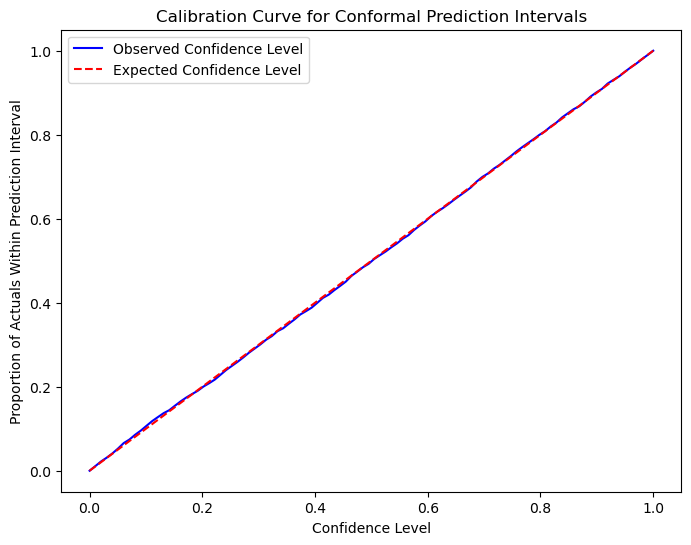

In [5]:
import numpy as np
data = np.concatenate((train_cal, test_cal), axis=0)

linear.cross_conformal_calibration_curve(data, test_cal, np.linspace(0, 1, 100))

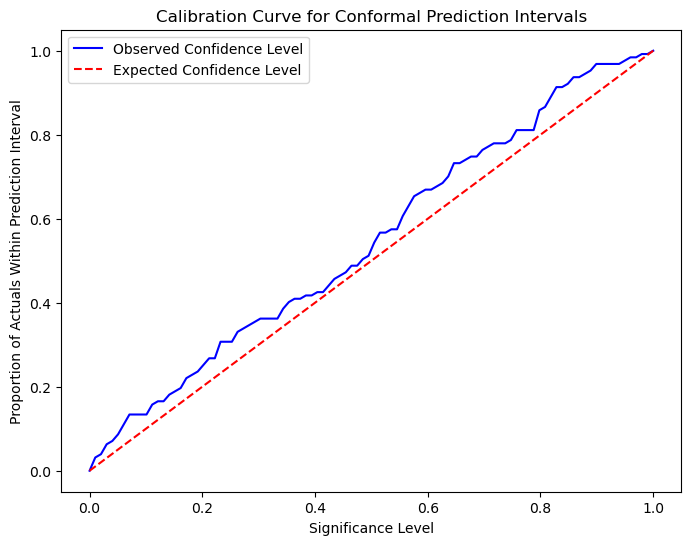

In [282]:
data = np.concatenate((train_bos, test_bos), axis=0)

linear.cross_conformal_calibration_curve(data, test_bos, np.linspace(0, 1, 100))